In [227]:
%matplotlib inline

In [228]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [229]:
# Memory array parameters
rHRS = 1e6
rPU = 1e3
rON = 1e3
n = np.array([2, 8, 16, 32, 64, 128, 256, 512, 1024, 2048, 3072, 4096, 5120])
vRead = 1.6

In [230]:
# Sneak path resistance
r_sneak = rHRS * (2*n - 1) / (n - 1)**2

# Current calculations through Rpu (i.e. Isneak + ICRS)
ihrs = vRead * (1.0 / r_sneak + 1.0 / rHRS) / (rPU / r_sneak + rPU / rHRS + 1.0)
ion = vRead * (1.0 / r_sneak + 1.0 / rON) / (rPU / r_sneak + rPU / rON + 1.0)

# Normalized voltage calculations accross cell (note these are independent of vRead)
mhrs = 1 - rPU * ihrs / vRead
mon = 1 - rPU * ion / vRead

margin = abs(mhrs - mon)

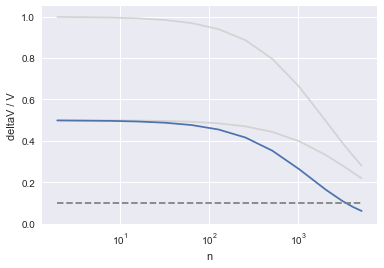

In [231]:
plt.plot(n, mhrs, c = 'lightgray')
plt.plot(n, mon, c = 'lightgray')
plt.plot(n, margin)
plt.plot([2, 5120], [0.1, 0.1], c='gray', ls='--')
plt.ylim([0,1.05])
plt.xscale('log')
plt.xlabel("n")
plt.ylabel("deltaV / V")
plt.savefig("figures/read_margin_analysis_Rhrs{:.0e}_Ron{:.0e}.png".format(rHRS, rON), dpi=300, figsize=(10,12))
plt.show()

In [232]:
maxn = np.int(np.interp(0.1, margin[::-1], n[::-1]))
print maxn

3456
